In [16]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from astropy.coordinates import Angle
from pathlib import Path
from gammapy.maps import Map
from gammapy.visualization import MapPanelPlotter

from matplotlib.visualization import simple_norm

from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd

## Chandra SNRs

In [2]:
image_g111 = fits.open('../chandra-snrs/data/G111.7-02.1-flux.fits.gz')
image_g292 = fits.open('../chandra-snrs/data/G292.0+01.8-flux.fits.gz')

In [3]:
def plot_image(ax, data, vmax):
    norm = simple_norm(data, 'sqrt', min_cut=0, max_cut=vmax)
    ax.imshow(data, cmap='viridis', norm=norm, origin='lower')


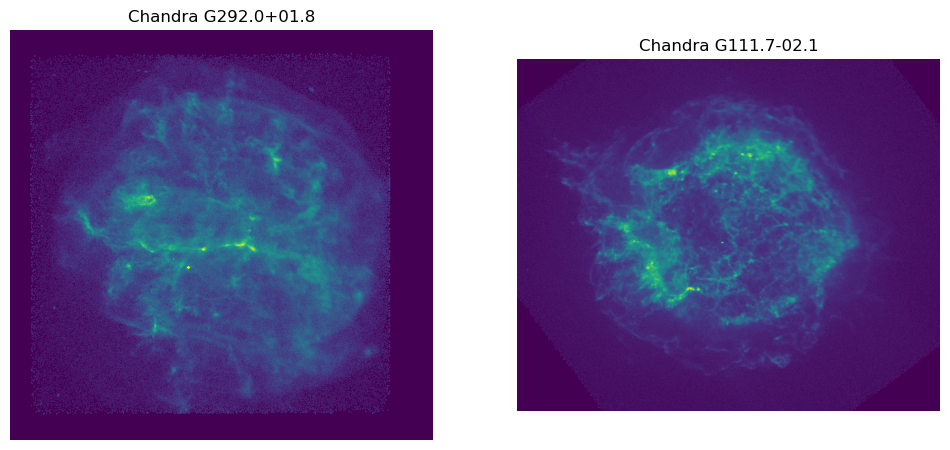

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_image(axes[0], image_g292[0].data, vmax=1e-5)
plot_image(axes[1], image_g111[0].data, vmax=1e-4)

axes[0].set_title('Chandra G292.0+01.8')
axes[1].set_title('Chandra G111.7-02.1')

axes[0].axis('off')
axes[1].axis('off')

plt.savefig('../chandra-snrs/plots/chandra-snrs.png')

## GLEAM Examples

In [5]:
path = Path("../../../adonath/jolideco-gmm-prior-library/gleam/data")
filenames = list(path.glob("*.fits.gz"))

In [6]:
example = Map.read(filenames[0])

In [68]:
target = Map.create(skydir=(-10, 0), width=("160d", "14d"), binsz="0.005d", frame="galactic")

In [69]:
array, footprint = reproject_and_coadd(
    filenames,
    output_projection=target.geom.wcs,
    shape_out=target.geom.data_shape,
    reproject_function=reproject_interp,
)

In [70]:
target.data = array

/Users/adonath/software/mambaforge/envs/gammapy-1.0/lib/python3.9/site-packages/astropy/units/quantity.py:502: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  value = np.array(value, dtype=dtype, copy=copy, order=order,
/var/folders/bt/7xysb53d3vj7m_snm7wt9jhc0000gp/T/ipykernel_48839/754937849.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


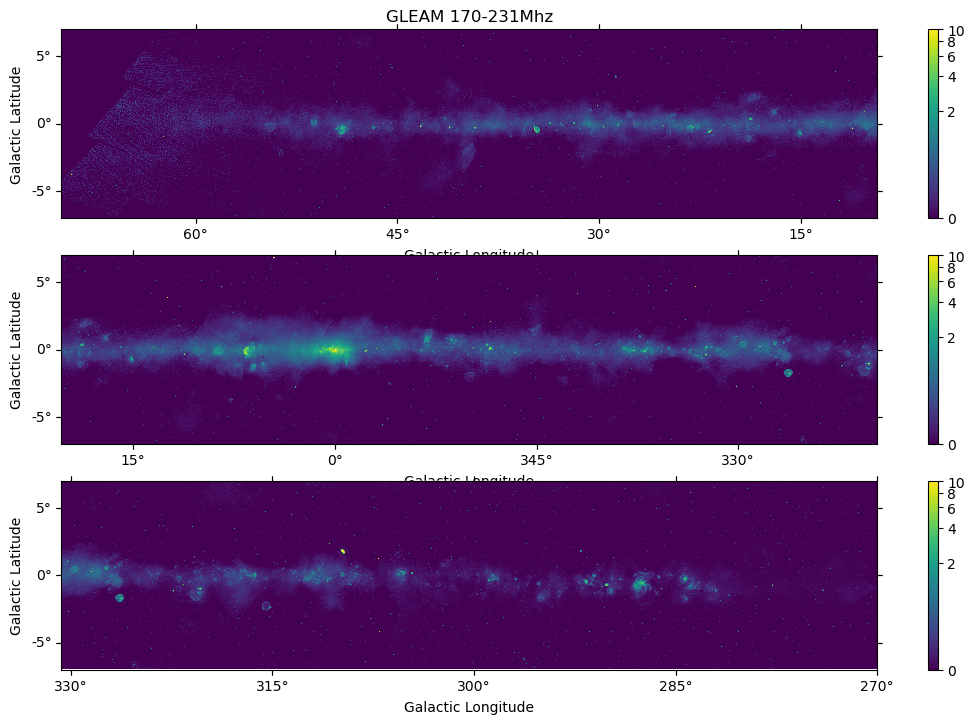

In [86]:
fig = plt.figure(figsize=(12, 8))

cmap = plt.get_cmap("viridis")
cmap.set_bad(cmap(0))

norm = simple_norm(target.data, stretch="asinh", min_cut=0, max_cut=10, asinh_a=0.05)

plotter = MapPanelPlotter(
    figure=fig,
    xlim=Angle([70, -90], "deg"),
    ylim=Angle([-7, 7], "deg"),
    npanels=3,
    left=0.05,
    bottom=0.08,
    top=0.95,
)

axes = plotter.plot(target, cmap=cmap, stretch="sqrt", add_cbar=True, norm=norm)
axes[0].set_title("GLEAM 170-231Mhz")

plt.tight_layout()
plt.savefig('../gleam/plots/gleam-data.png')